In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.plotly as py
from decimal import Decimal
from re import sub
from scipy.stats import pearsonr
import random
sns.set() # setting seaborn default for plots

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False   False  False  False  False  False  False   False   
12         False     False   False  False  False  False  False  False   False   
13         False     False   False  False  False  False  False  False   False   
14         False     False   False  False  False  False  False  False   False   
15         False     False   False  False  False  False  False  False   False   
16         False     False   False  False  False  False  False  False   False   
17         False     False   False  False  False   True  False  False   False   
18         False     False   False  False  False  False  False  False   False   
19         False     False   False  False  False   True  False  False   False   
20         False     False   False  False  False  False  False  False   False   
21         False     False   False  False  False  False  False  False   False   
22         False     False   False  False  False  False  False  False   False   
23         False     False   False  False  False  False  False  False   False   
24         False     False   False  False  False  False  False  False   False   
25         False     False   False  False  False  False  False  False   False   
26         False     False   False  False  False   True  False  False   False   
27         False     False   False  False  False  False  False  False   False   
28         False     False   False  False  False   True  False  False   False   
29         False     False   False  False  False   True  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
861        False     False   False  False  False  False  False  False   False   
862        False     False   False  False  False  False  False  False   False   
863        False     False   False  False  False   True  False  False   False   
864        False     False   False  False  False  False  False  False   False   
865        False     False   False  False  False  False  False  False   False   
866        False     False   False  False  False  False  False  False   False   
867        False     False   False  False  False  False  False  False   False   
868        False     False   False  False  False   True  False  False   False   
869        False     False   False  False  False  False  False  False   False   
870        False     False   False  False  False  False  False  False   False   
871        False     False   False  False  False  False  False  False   False   
872        False     False   False  False  False  False  False  False   False   
873        False     False   False  False  False  False  False  False   False   
874        False     False   False  False  False  False  False  False   False   
875        False     False   False  False  False  False  False  False   False   
876        False     False   False  False  False  False  False  False   False   
877        False     False   False  False  False  False  False  False   False   
878        False     False   False  

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
combine = [train,test]

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
combinedData = pd.concat(combine,sort=True)

In [10]:
combinedData.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [11]:
combinedData.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000

In [12]:
combinedData.describe(include=['O'])

Cabin Embarked              Name   Sex    Ticket
count           295     1307              1309  1309      1309
unique          186        3              1307     2       929
top     C23 C25 C27        S  Kelly, Mr. James  male  CA. 2343
freq              6      914                 2   843        11

In [13]:
train.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                                891   891    891   204      889
unique                               891     2    681   147        3
top     Vande Velde, Mr. Johannes Joseph  male   1601    G6        S
freq                                   1   577      7     4      644

In [14]:
combinedData[['Pclass','Survived']].groupby(['Pclass']).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [15]:
pClass = train['Pclass']

In [16]:
survived = train['Survived']

In [17]:
pearsonr(pClass,survived)

(-0.33848103596101536, 2.53704738798042e-25)

In [18]:
sex = train['Sex']

In [19]:
newValueSex = []
for value in sex:
    if value == "male":
        newValueSex.append(0)
    else:
        newValueSex.append(1)

In [20]:
pearsonr(newValueSex,survived)

(0.5433513806577552, 1.406066130879597e-69)

In [21]:
train[['Sex','Survived']].groupby(['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

In [22]:
dropAgeNaN = train.dropna(subset=['Age'])

In [23]:
age = dropAgeNaN['Age']

In [24]:
died = dropAgeNaN.loc[dropAgeNaN['Survived'] == 0]

In [25]:
survived = dropAgeNaN.loc[dropAgeNaN['Survived'] == 1]

In [26]:
diedAge = died['Age']
survivedAge = survived['Age']

C:\Users\cywon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Age Frequency on Non-Survivors')

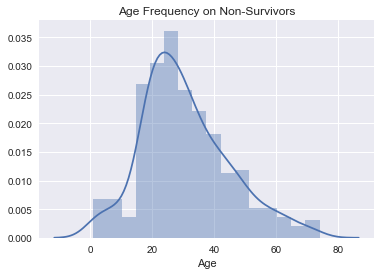

In [27]:
sns.distplot(diedAge).set_title("Age Frequency on Non-Survivors")

C:\Users\cywon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



Text(0.5,1,'Age Frequency on Survivors')

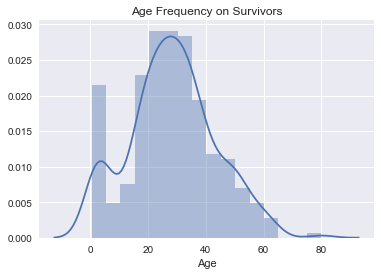

In [28]:
sns.distplot(survivedAge).set_title("Age Frequency on Survivors")

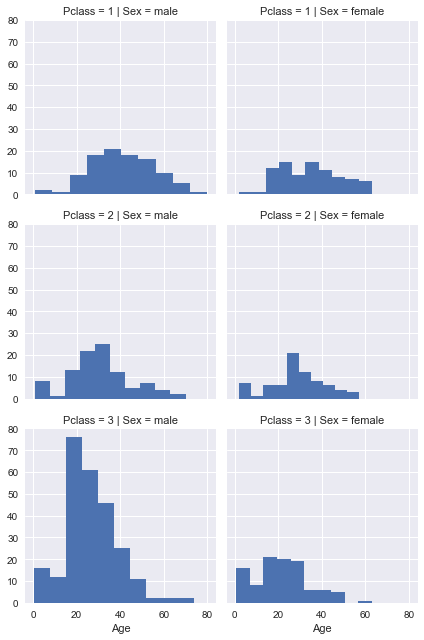

In [29]:
pClassAgeSex = sns.FacetGrid(train, row='Pclass',col='Sex')
pClassAgeSex.map(plt.hist,'Age')

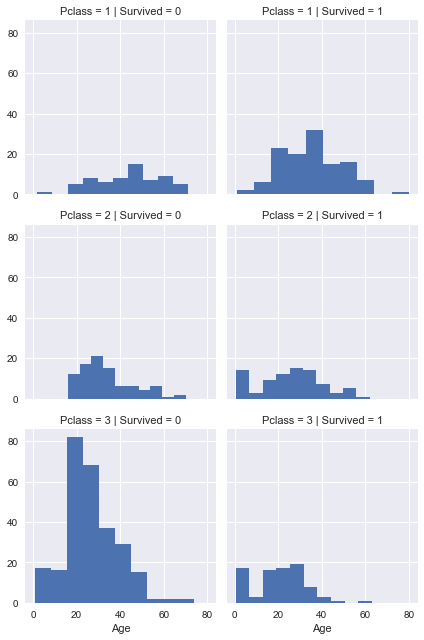

In [30]:
pClassAgeSex = sns.FacetGrid(train, row='Pclass',col='Survived')
pClassAgeSex.map(plt.hist,'Age')

C:\Users\cywon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



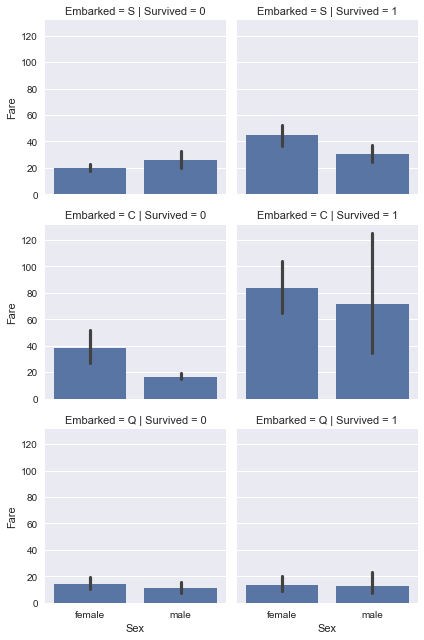

In [31]:
pClassAgeSex = sns.FacetGrid(train, row='Embarked',col='Survived')
pClassAgeSex.map(sns.barplot,'Sex','Fare')

In [32]:
train[['Embarked','Survived']].groupby(['Embarked']).mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957

In [33]:
sex = train['Sex']

In [34]:
newValueSex = []
for value in sex:
    if value == "male":
        newValueSex.append(0)
    else:
        newValueSex.append(1)

In [35]:
sexSeries = pd.Series(newValueSex)

In [36]:
newTrain = train.assign(Sex=sexSeries)

In [37]:
newTrain.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [38]:
newTrain['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
def fillAge():
    return(random.uniform(14.526497,29.699118))

In [40]:
newTrain['Age'] = newTrain['Age'].fillna(fillAge())

In [41]:
newTrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
newTrain = newTrain.drop(['Cabin','Ticket'], axis=1)

In [43]:
newTrain.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

      Fare Embarked  
0   7.2500        S  
1  71.2833        C  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S

In [44]:
newTrain['Embarked'] = newTrain['Embarked'].fillna('C')

In [45]:
newTrain.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [46]:
newTrain['Fare'].mode()

0    8.05
dtype: float64

In [47]:
newTrain['Fare'] = newTrain['Fare'].fillna(newTrain['Fare'].mode())

In [48]:
newTrain['Fare'].isna().sum()

0

In [49]:
fareRange = pd.cut(newTrain['Fare'],[-0.001,7.91,14.454,31.0,512.329],labels=[0,1,2,3])

In [50]:
newTrain = newTrain.assign(Fare=fareRange)

In [51]:
newTrain.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

  Fare Embarked  
0    0        S  
1    3        C  
2    1        S  
3    3        S  
4    1        S